![picture](https://drive.google.com/uc?id=1ITKOsQxZjMc2qcJ0d5sw7pra7v-VwIvs)

# Importing the dependencies:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection and EDA

In [ ]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/ML Projects Workflow/diabetes.csv') #loading the dataset

In [ ]:
diabetes_df.head() #display the top 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.dtypes #dtypes of the columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
diabetes_df.describe() #descriptive statistics of features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.shape  # number of rows and columns

(768, 9)

In [ ]:
diabetes_df.duplicated().sum()  #checking for duplicated values

0

In [ ]:
diabetes_df.isnull().sum() #checking for null data.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

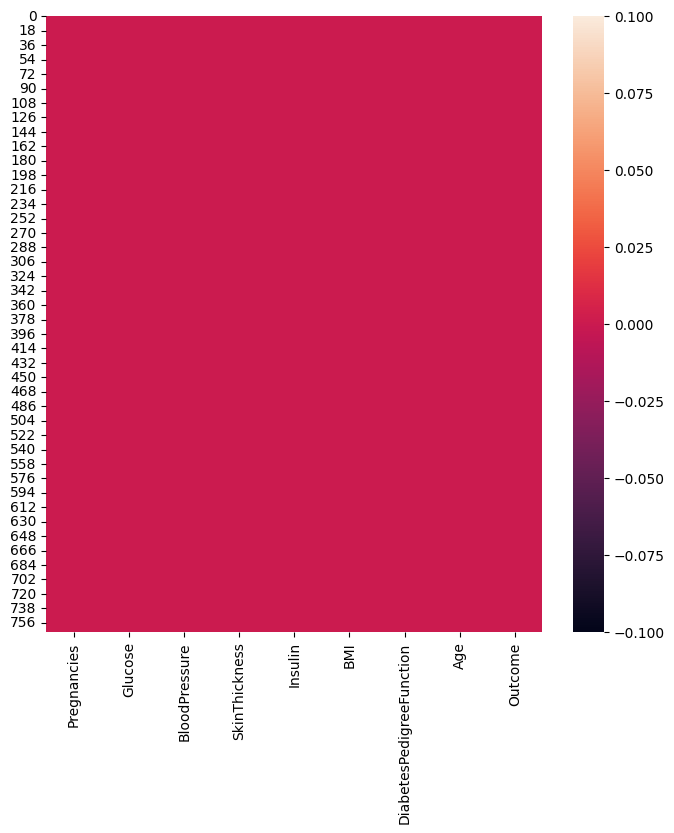

In [ ]:
# create the heatmap to see any missing data point
plt.figure(figsize=(8,8))
sns.heatmap(diabetes_df.isnull())
plt.show()

In [ ]:
diabetes_df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# checking the imbalance datapoints for target feature

diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

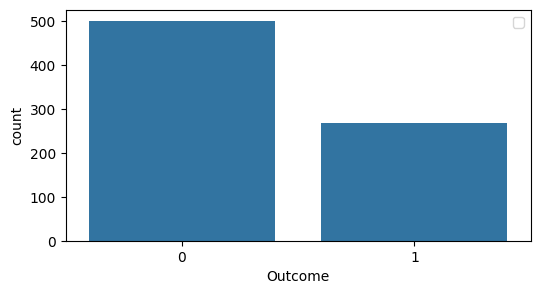

In [ ]:
# The count of Outcomes
plt.figure(figsize=(6,3))
sns.countplot(x='Outcome', data=diabetes_df)
plt.legend()
plt.show()

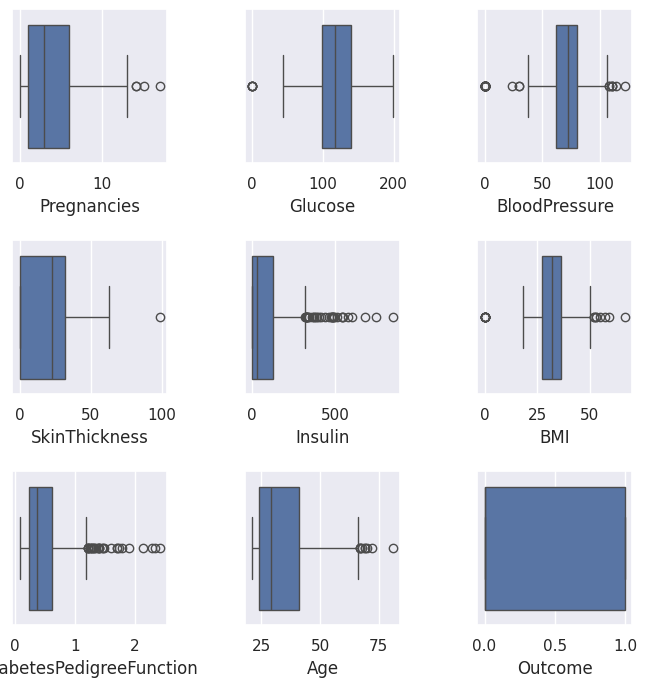

In [ ]:
# Observering Outliers using BOX-Plot

plt.figure(figsize=(8,8))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
  plt.subplot(3,3, i+1)
  sns.boxplot(x = col, data=diabetes_df)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()


In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

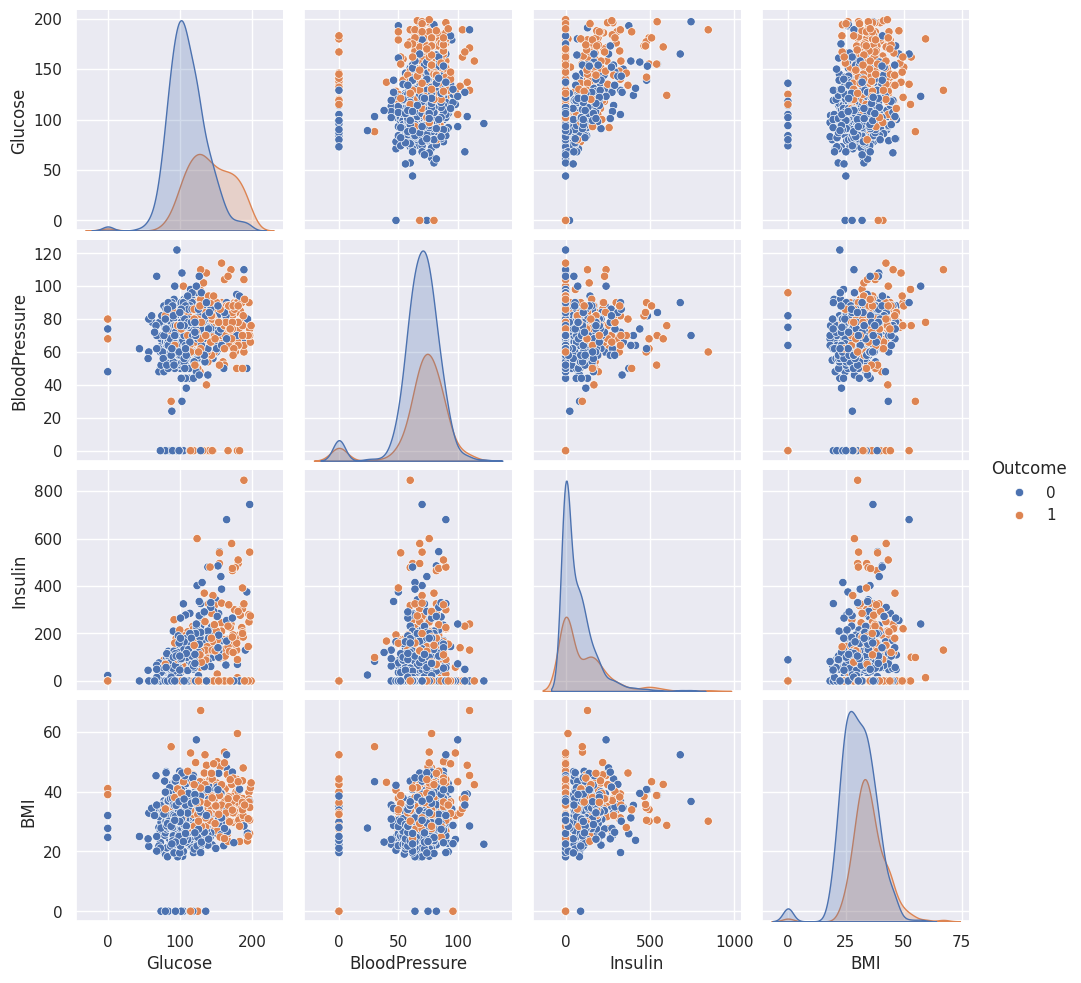

In [ ]:
# Create Pair-Plots to visualize the distribution and relationship between the features.
sns.set(rc={'figure.figsize':(12, 8)})
sns.pairplot(data=diabetes_df,
             height= 2.5,
             vars=['Glucose','BloodPressure','Insulin','BMI'],
             hue='Outcome',
             kind='scatter',
             diag_kind='kde',
             dropna=True)

plt.show()


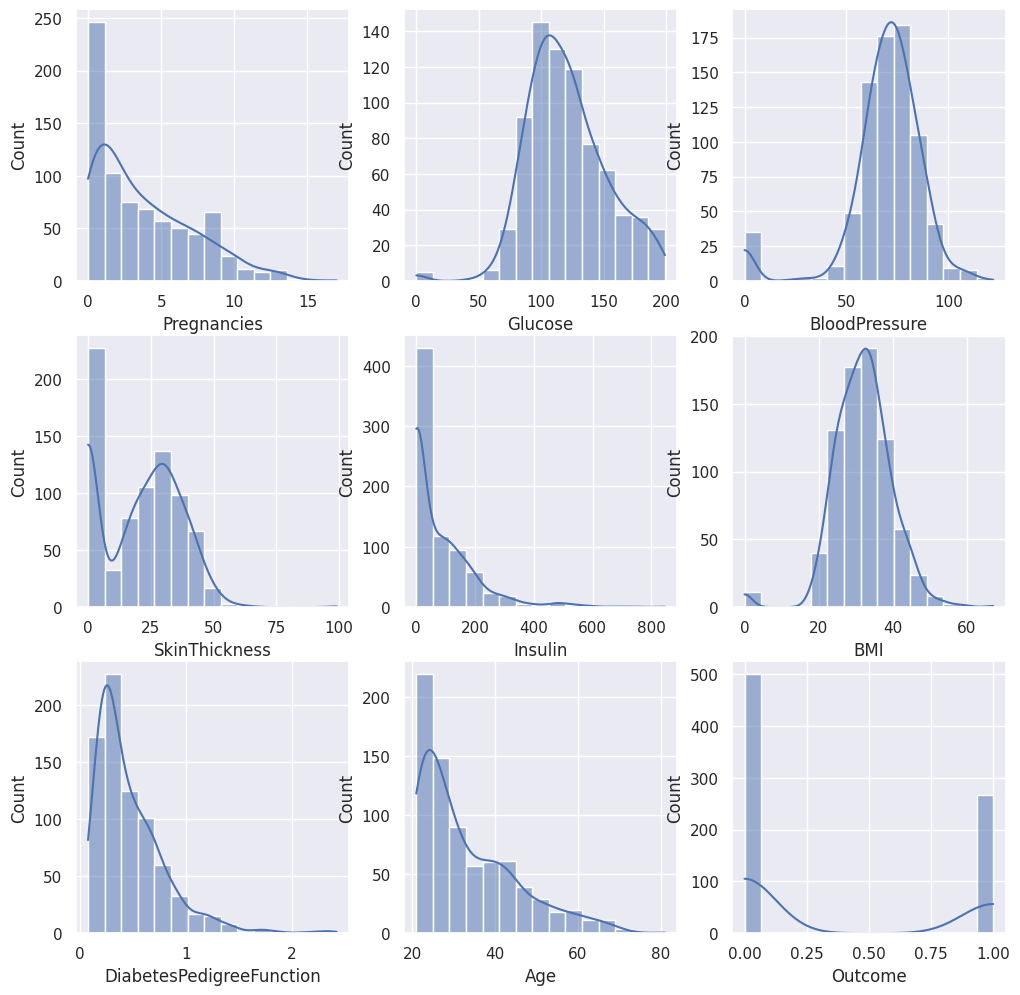

In [ ]:
# create the histogram plot for every feature to check their distribution.
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
  plt.subplot(3,3, i+1)
  sns.histplot(bins=15, x = col, data=diabetes_df, kde=True)

plt.show()

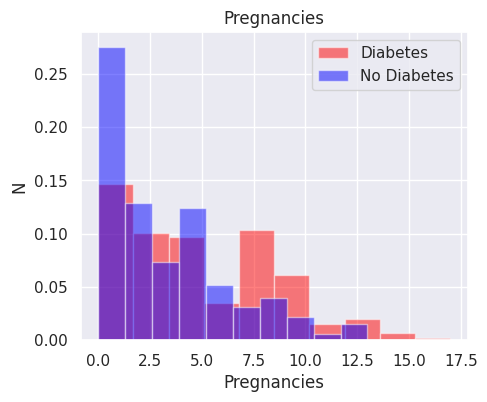

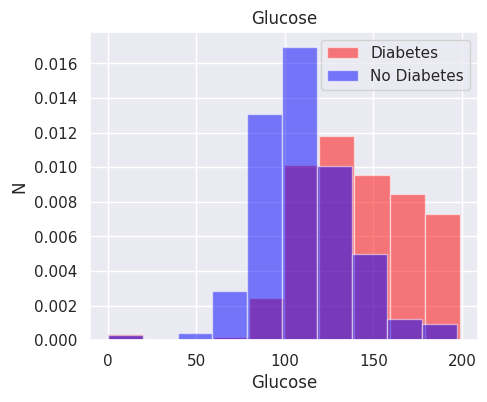

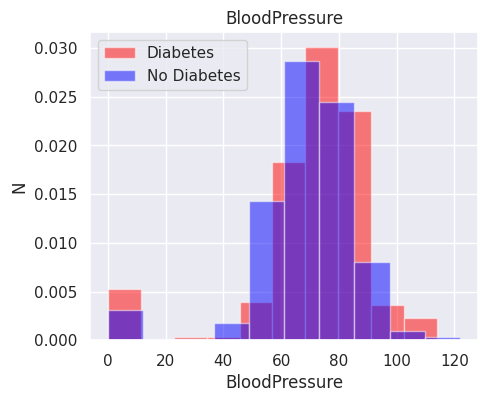

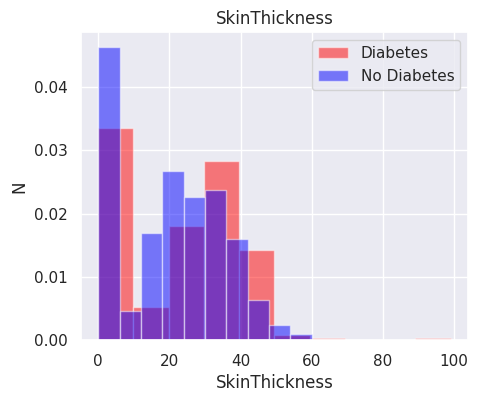

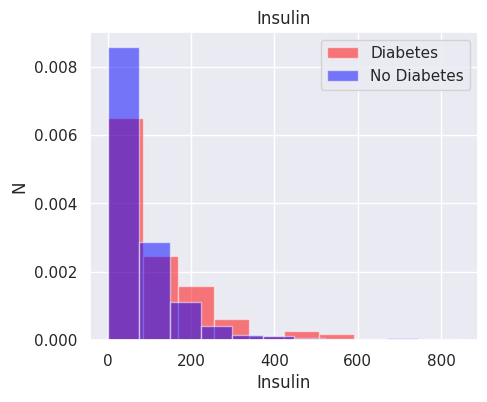

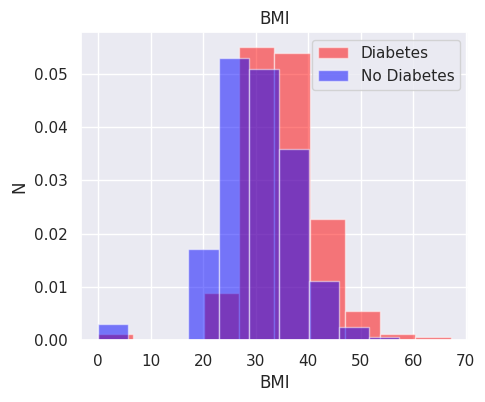

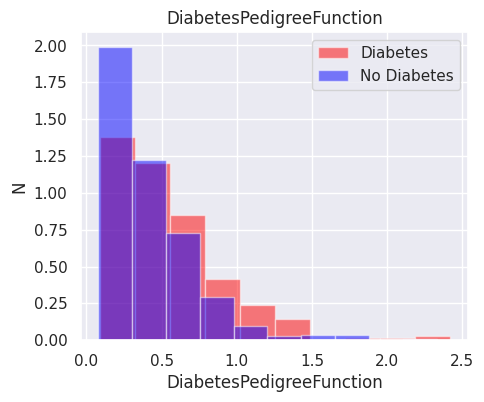

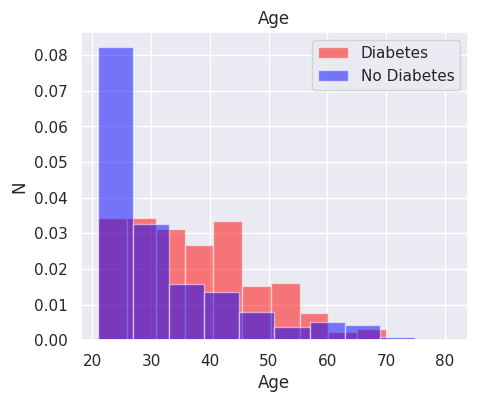

In [ ]:
# checking the distribution of the dataset for each features for Diabetic and Non-Diabetic individually.
for i in range(len(diabetes_df.columns[:-1])):
  plt.figure(figsize=(5,4))
  label = diabetes_df.columns[i]
  plt.hist(diabetes_df[diabetes_df['Outcome']==1][label],color='red',label= 'Diabetes', alpha=0.5, density=True)
  plt.hist(diabetes_df[diabetes_df['Outcome']==0][label],color='blue',label= 'No Diabetes', alpha=0.5, density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('N')
  plt.legend()
  plt.show()


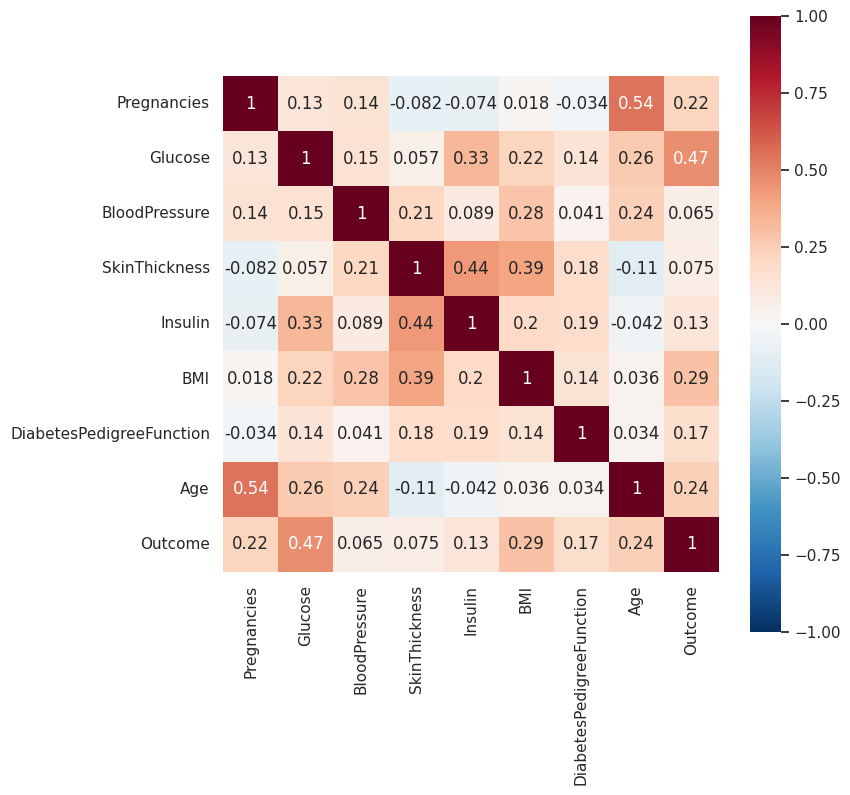

In [ ]:
# create the heatmap to see the correlation between different features.
plt.figure(figsize=(8,8))
sns.heatmap(diabetes_df.corr(), square=True,vmin=-1, center=0, annot=True, cmap='RdBu_r')
plt.show()

In [ ]:
diabetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#separating the data and labels
X = diabetes_df.drop(columns='Outcome', axis=1)
y = diabetes_df['Outcome']

# Standardize the data

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
scaled_df = pd.DataFrame(standardized_data, columns= diabetes_df.columns[:-1]) # converting the array into dataframe

In [ ]:
X = scaled_df
y = diabetes_df['Outcome']

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Train Test Split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp, random_state=1)

In [ ]:
print(X.shape, X_train.shape, X_valid.shape, X_test.shape)

(768, 8) (614, 8) (77, 8) (77, 8)


# Model Training:

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
# training the support vector Machine Classifier

classifier.fit(X_train,y_train)

SVC(kernel='linear')

# Model Evalution:

# Accuracy Metric

In [ ]:
# accuracy on the training data
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)

In [ ]:
print('Accuracy on training data: {}%'.format(round((training_data_accuracy*100),2)))

Accuracy on training data: 78.34%


In [ ]:
# accuracy on the validation data
X_valid_pred = classifier.predict(X_valid)
validation_data_accuracy = accuracy_score(X_valid_pred, y_valid)

In [ ]:
print('Accuracy on validation data: {}%'.format(round((validation_data_accuracy*100),2)))

Accuracy on validation data: 76.62%


In [ ]:
# accuracy on the test data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)

In [ ]:
print('Accuracy on test data: {}%'.format(round((test_data_accuracy*100),2)))

Accuracy on test data: 79.22%


# Making a Predictive System:

In [ ]:
input_data = (10 ,139, 80, 0, 0, 27.1, 1.441, 57)

#changing the input data as numpy array as processing of array is easy & fast.
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print("Diabetic" if prediction == 1 else "Non Diabetic")

[[ 1.82781311  0.56664949  0.56322275 -1.28821221 -0.69289057 -0.62096232
   2.92686858  2.02160968]]
Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Classification Metrics:

# 1. Log Loss

In [ ]:
from sklearn.metrics import log_loss
ll_model1 = log_loss(y_test,X_test_pred)

In [ ]:
ll_model1  #more loss-worst model, less loss-best model.

7.489590314621746

# 2. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_model1 = confusion_matrix(y_test, X_test_pred)

In [ ]:
cm_model1

array([[47,  3],
       [13, 14]])

# 3.Classification Report

In [ ]:
from sklearn.metrics import classification_report
cr_model1 = classification_report(y_test,X_test_pred)

In [ ]:
print(cr_model1)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        50
           1       0.82      0.52      0.64        27

    accuracy                           0.79        77
   macro avg       0.80      0.73      0.75        77
weighted avg       0.80      0.79      0.78        77



# 4.Area under ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1, tpr_model1, threshold_model1 = roc_curve(y_test, X_test_pred)
print('roc_auc_score_model1: ',roc_auc_score(y_test, X_test_pred))

roc_auc_score_model1:  0.7292592592592593


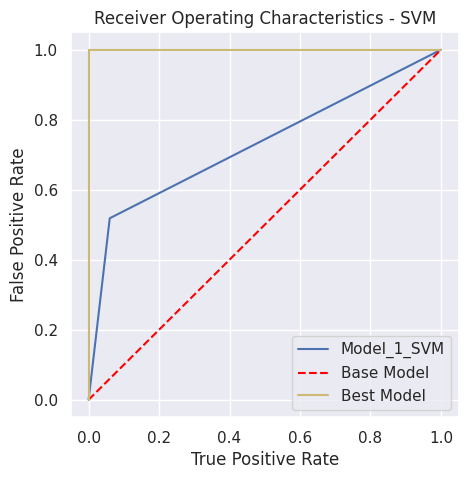

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristics - SVM')
plt.plot(fpr_model1, tpr_model1, label="Model_1_SVM")
plt.plot([0,1],ls="--",c='red', label="Base Model")
plt.plot([1,1],c='y'),plt.plot([0,0],[1,0],c='y',label='Best Model')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()